<a href="https://colab.research.google.com/github/yasht5/btp/blob/master/btp_1._grubcut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import glob

In [ ]:
from PIL import Image

In [ ]:
import image_slicer

In [ ]:
path = "/content/imgtest9/*.*"
for p in glob.glob(path):
  image_slicer.slice(p, 5)

In [ ]:
path = "/content/imgtest9/*.*"
for p in glob.glob(path):
  im = Image.open(p)
  imgwidth, imgheight = im.size
  print(('Image size is: %d x %d ' % (imgwidth, imgheight)))

Image size is: 91 x 91 
Image size is: 311 x 162 
Image size is: 264 x 263 
Image size is: 103 x 81 
Image size is: 275 x 183 
Image size is: 91 x 91 
Image size is: 91 x 91 
Image size is: 99 x 84 
Image size is: 91 x 91 
Image size is: 426 x 360 
Image size is: 92 x 91 
Image size is: 793 x 526 
Image size is: 299 x 168 
Image size is: 91 x 91 
Image size is: 426 x 360 
Image size is: 426 x 360 
Image size is: 103 x 81 
Image size is: 92 x 91 
Image size is: 1280 x 720 
Image size is: 426 x 360 
Image size is: 264 x 263 
Image size is: 92 x 91 
Image size is: 103 x 81 
Image size is: 103 x 81 
Image size is: 99 x 84 
Image size is: 92 x 91 
Image size is: 99 x 84 
Image size is: 92 x 91 
Image size is: 99 x 84 
Image size is: 264 x 263 
Image size is: 103 x 81 
Image size is: 264 x 263 
Image size is: 264 x 263 
Image size is: 426 x 360 
Image size is: 99 x 84 
Image size is: 426 x 360 
Image size is: 92 x 91 
Image size is: 91 x 91 
Image size is: 103 x 81 
Image size is: 276 x 183 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


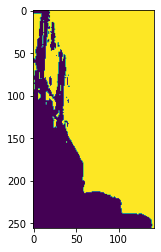

In [15]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test1.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


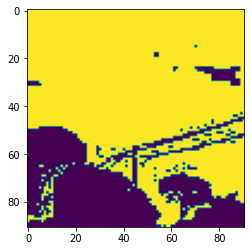

In [17]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test2.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


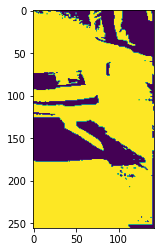

In [18]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test3.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


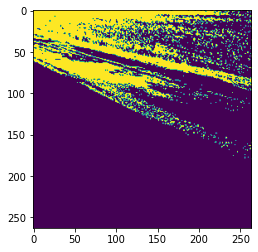

In [19]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test4.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


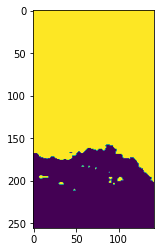

In [20]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test5.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


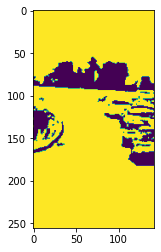

In [21]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test6.png", 0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


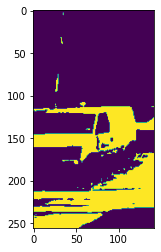

In [22]:

from __future__ import division
import cv2, scipy, numpy, math
from matplotlib import pyplot
from PIL import Image
from pylab import *
from google.colab.patches import cv2_imshow

def im_threshold(im):
    res = numpy.empty(im.shape, dtype=uint8)
    hist, bins = numpy.histogram(im.flatten(),256,[0,256])
    H = 0   # H -> entropy
    T = 0   # T -> threshold
    N = im.shape[0]*im.shape[1]   # N -> Total number of pixels
    P = hist/N  # Array of Probability of each grayscale
    #print "prob", len(hist)
    pc = P.cumsum()
    for t in range(0, 255):
        a = P[:t]/sum(P[:t])    # P(i)/P(i1)+P(i2)+...+P(iT-1) where 0 < i < T
        b = P[t:]/sum(P[t:])    # P(i)/P(iT)+..+P(i255) where T < i < 255
        ha = sum(a)*numpy.log(sum(a))  # H(A)
        hb = sum(b)*numpy.log(sum(b))  # H(B)
        #ha = sum(map(lambda x: x*numpy.log(x), a))
        #hb = sum(map(lambda x: x*numpy.log(x), b))
        ht = -ha-hb  # H(T) = H(A) + H(B)
        if ht > H:  # choosing T such that H(T) is maximum
            H = ht
            T = t

    #print T
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i][j] < T: # if intensity below T set to 0
                res[i][j] = 0
            elif im[i][j] >= T:   # if intensity greater than or equal to T, set to 255
                res[i][j] = 255

    plt.imshow(im)
    plt.imshow(res)
    
im_threshold(cv2.imread("/content/imgtest/test7.png", 0))

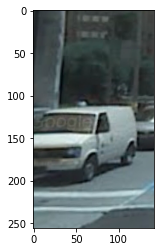

In [55]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread("/content/imgtest/test7.png")
plt.imshow(img)

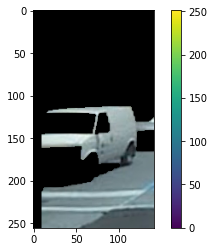

(<matplotlib.image.AxesImage at 0x7fd310910390>,
 None)

In [58]:

mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (10,100,450,290)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()

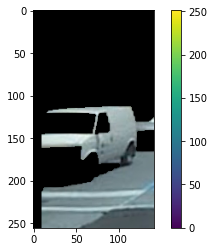

(<matplotlib.image.AxesImage at 0x7fd3106beb50>,
 None)

In [59]:
# newmask is the mask image I manually labelled
newmask = cv.imread('newmask.png',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.imshow(img),plt.colorbar(),plt.show()